In [1]:
# !pip install fasteda
# from fasteda import fast_eda
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.manifold import TSNE

In [2]:
train = pd.read_csv("./train.csv").drop('id',axis=1)
test = pd.read_csv("./test.csv").drop('id',axis=1)
original = pd.read_csv("./ConcreteStrengthData.csv")

In [3]:
original = original.rename(columns={'CementComponent ':'CementComponent'})

In [4]:
print(original.columns)
print(train.columns)

Index(['CementComponent', 'BlastFurnaceSlag', 'FlyAshComponent',
       'WaterComponent', 'SuperplasticizerComponent',
       'CoarseAggregateComponent', 'FineAggregateComponent', 'AgeInDays',
       'Strength'],
      dtype='object')
Index(['CementComponent', 'BlastFurnaceSlag', 'FlyAshComponent',
       'WaterComponent', 'SuperplasticizerComponent',
       'CoarseAggregateComponent', 'FineAggregateComponent', 'AgeInDays',
       'Strength'],
      dtype='object')


In [5]:
print(len(train))
print(len(test))

5407
3605


In [6]:
train = pd.concat([train,original],axis=0)
train = train.drop_duplicates().reset_index(drop=True)
train = train[train['AgeInDays'] != 49]


In [7]:
# Calculate TotalComponentWeight
train['TotalComponentWeight'] = train['CementComponent'] + train['BlastFurnaceSlag'] + train['FlyAshComponent'] + train['WaterComponent'] + train['SuperplasticizerComponent'] + train['CoarseAggregateComponent'] + train['FineAggregateComponent']

# Calculate Water-Cement-Ratio (WCR)
train['WCR'] = train['WaterComponent'] / train['CementComponent']

# Calculate Aggregate-Ratio (AR)
train['AR'] = (train['CoarseAggregateComponent'] + train['FineAggregateComponent']) / train['CementComponent']

# Calculate Water-Cement-Plus-Pozzolan-Ratio (WCPR)
train['WCPR'] = train['WaterComponent'] / (train['CementComponent'] + train['BlastFurnaceSlag'] + train['FlyAshComponent'])

# Calculate Cement-Age
train['Cement-Age'] = train['CementComponent'] * train['AgeInDays']

In [8]:
# Calculate TotalComponentWeight
test['TotalComponentWeight'] = test['CementComponent'] + test['BlastFurnaceSlag'] + test['FlyAshComponent'] + test['WaterComponent'] + test['SuperplasticizerComponent'] + test['CoarseAggregateComponent'] + test['FineAggregateComponent']

# Calculate Water-Cement-Ratio (WCR)
test['WCR'] = test['WaterComponent'] / test['CementComponent']

# Calculate Aggregate-Ratio (AR)
test['AR'] = (test['CoarseAggregateComponent'] + test['FineAggregateComponent']) / test['CementComponent']

# Calculate Water-Cement-Plus-Pozzolan-Ratio (WCPR)
test['WCPR'] = test['WaterComponent'] / (test['CementComponent'] + test['BlastFurnaceSlag'] + test['FlyAshComponent'])

# Calculate Cement-Age
test['Cement-Age'] = test['CementComponent'] * test['AgeInDays']

In [9]:
train['Unknown'] = (train.CoarseAggregateComponent) - (train.CementComponent + train.BlastFurnaceSlag + train.FlyAshComponent)
test['Unknown'] = (test.CoarseAggregateComponent) - (test.CementComponent + test.BlastFurnaceSlag + test.FlyAshComponent)

In [10]:
print(len(train))
print(len(test))

6411
3605


In [11]:
train

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength,TotalComponentWeight,WCR,AR,WCPR,Cement-Age,Unknown
0,525.0,0.0,0.0,186.0,0.0,1125.0,613.0,3,10.38,2449.0,0.354286,3.310476,0.354286,1575.0,600.0
1,143.0,169.0,143.0,191.0,8.0,967.0,643.0,28,23.52,2264.0,1.335664,11.258741,0.419780,4004.0,512.0
2,289.0,134.7,0.0,185.7,0.0,1075.0,795.3,28,36.96,2479.7,0.642561,6.471626,0.438282,8092.0,651.3
3,304.0,76.0,0.0,228.0,0.0,932.0,670.0,365,39.05,2210.0,0.750000,5.269737,0.600000,110960.0,552.0
4,157.0,236.0,0.0,192.0,0.0,935.4,781.2,90,74.19,2301.6,1.222930,10.933758,0.488550,14130.0,542.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6407,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28,2309.6,0.649783,5.927641,0.372074,7739.2,387.4
6408,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18,2275.5,0.608318,5.063004,0.447693,9021.6,380.1
6409,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70,2267.7,1.297643,11.261953,0.486003,4158.0,495.9
6410,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77,2311.2,1.103708,11.178504,0.507808,4454.8,643.8


In [12]:
print([i for i in sorted(train.AgeInDays.unique())])
print([i for i in sorted(test.AgeInDays.unique())])


[1, 3, 7, 14, 28, 56, 90, 91, 100, 120, 180, 270, 360, 365]
[1, 3, 7, 11, 14, 28, 56, 90, 91, 100, 120, 180, 270, 360, 365]


In [13]:
test.loc[197,'AgeInDays'] = 14

In [14]:
print([i for i in sorted(train.AgeInDays.unique())])
print([i for i in sorted(test.AgeInDays.unique())])


[1, 3, 7, 14, 28, 56, 90, 91, 100, 120, 180, 270, 360, 365]
[1, 3, 7, 14, 28, 56, 90, 91, 100, 120, 180, 270, 360, 365]


In [15]:
print(len(train))
print(len(test))

6411
3605


In [16]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit([i for i in sorted(train.AgeInDays.unique())])
train.AgeInDays = encoder.transform(train.AgeInDays)
test.AgeInDays = encoder.transform(test.AgeInDays)

In [17]:
train.describe()

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength,TotalComponentWeight,WCR,AR,WCPR,Cement-Age,Unknown
count,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000,6411.000000
mean,295.934846,60.710232,35.575074,184.604757,4.409209,989.259785,771.460443,4.338325,35.415860,2341.954347,0.718428,6.872551,0.503668,15748.312479,597.039632
std,105.609623,83.995827,56.869697,19.018388,5.770679,77.462298,78.977890,2.636039,16.379638,80.395058,0.300063,2.819865,0.150839,24887.600160,138.851403
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,0.000000,2.330000,1991.500000,0.259364,2.880105,0.179278,306.000000,74.000000
25%,212.500000,0.000000,0.000000,173.500000,0.000000,938.000000,734.300000,2.000000,23.640000,2291.600000,0.502618,4.689741,0.400000,2779.000000,506.000000
50%,295.800000,0.000000,0.000000,186.000000,0.000000,975.600000,781.000000,4.000000,33.940000,2347.000000,0.630435,5.976783,0.488550,7756.000000,625.000000
75%,374.000000,129.800000,94.050000,192.000000,8.650000,1047.000000,821.000000,5.000000,45.710000,2394.150000,0.850071,8.592708,0.580060,15232.700000,694.900000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,13.000000,82.600000,2766.900000,1.989247,18.696078,1.989247,197100.000000,972.000000


/Users/junho/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/junho/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


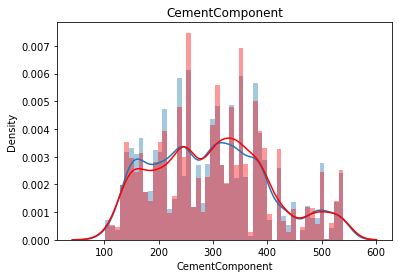

/Users/junho/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/junho/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


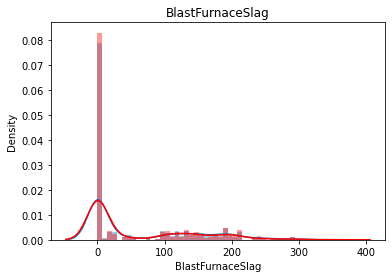

/Users/junho/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/junho/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


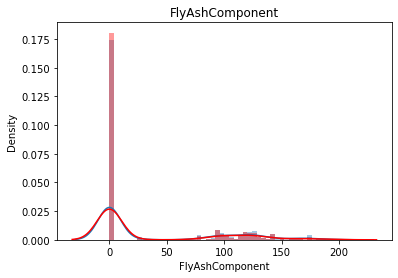

/Users/junho/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/junho/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


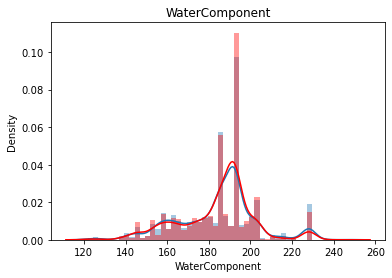

/Users/junho/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/junho/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


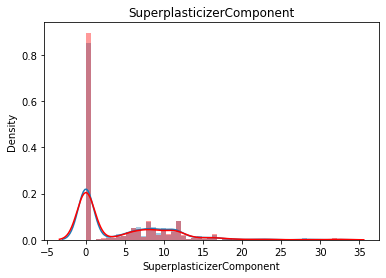

/Users/junho/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/junho/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


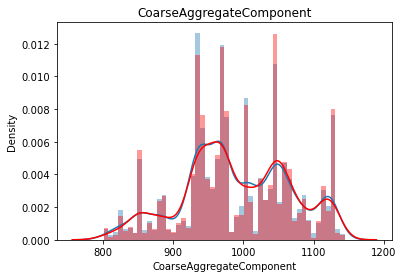

/Users/junho/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/junho/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


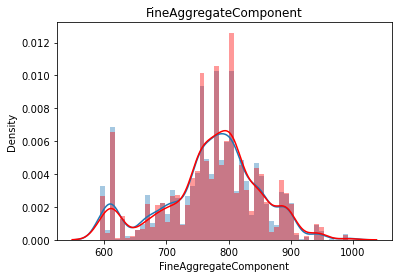

/Users/junho/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/junho/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


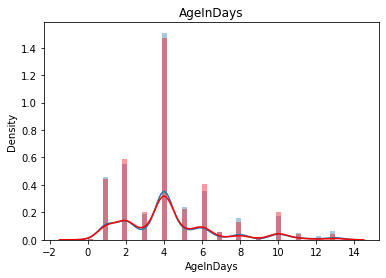

/Users/junho/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/junho/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


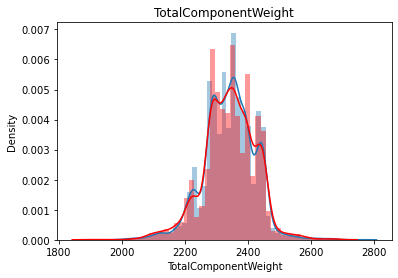

/Users/junho/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/junho/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


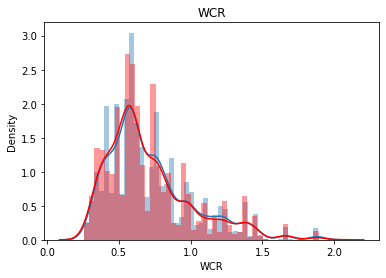

/Users/junho/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/junho/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


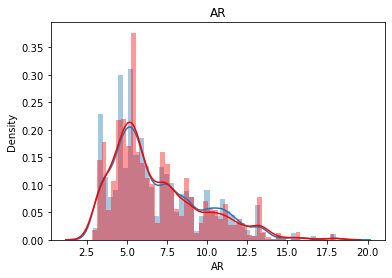

/Users/junho/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/junho/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


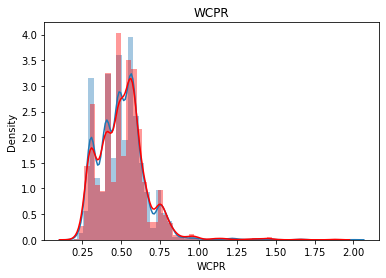

/Users/junho/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/junho/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


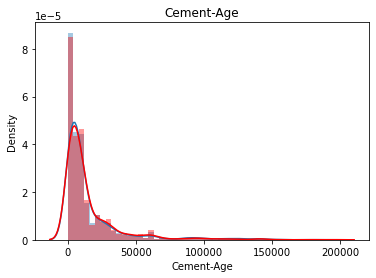

/Users/junho/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/junho/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


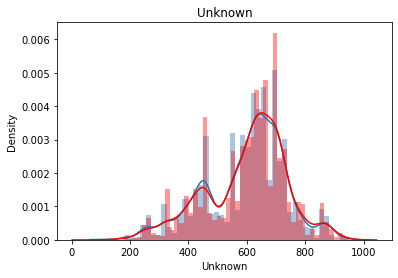

In [18]:
# 콘크리트의 강도는 물과 시멘트의 비율이 낮아지면 증가합니다.
# CementComponent:- Amount of cement is mixed
# BlastFurnaceSlag:- Amount of Blast Furnace Slag is mixed
# FlyAshComponent:- Amount of FlyAsh is mixed
# WaterComponent:- Amount of water is mixed
# SuperplasticizerComponent:- Amount of Super plasticizer is mixed
# CoarseAggregateComponent:- Amount of Coarse Aggregate is mixed
# FineAggregateComponent:- Amount of Coarse Aggregate is mixed
# AgeInDays:- How many days it was left dry
# Strength:- What was the final strength of concrete- (Target)
for i in test.columns:
    plt.title(f'{i}')
    sns.distplot(train[f'{i}'],bins=50)#.plot.hist(bins=100,grid='on',figsize=(5,5))
    sns.distplot(test[f'{i}'],color='red',bins=50)#.plot.hist(bins=100,grid='on',figsize=(5,5))
    plt.show()


In [34]:
train = train.reset_index(drop=True)

In [45]:
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
import optuna
from optuna.samplers import TPESampler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import GridSearchCV
from tqdm import tqdm

In [46]:
target = 'Strength'
features = [c for c in train.columns if c not in [target]]

In [47]:
kf = KFold(n_splits = 10, random_state = 41, shuffle = True)
models = []
val_scores = []
preds = []

params = {
'n_estimators':15000,
'max_depth':5,
'early_stopping_rounds':200,
'learning_rate':0.008,
'one_hot_max_size':3,
'bootstrap_type':"MVS",
'l2_leaf_reg':2,
'random_state':41
         }

for i, (train_index, val_index) in tqdm(enumerate(kf.split(train, train[target]))):
    
    X_train, X_val = train[features].loc[train_index], train[features].loc[val_index]
    y_train, y_val = train[target][train_index], train[target][val_index]
    
#     if include_orig:
#         X_train = X_train.append(original[features], ignore_index = True)
#         y_train = y_train.append(original[target], ignore_index = True)
    
    model = CatBoostRegressor(**params)
    
    model.fit(X_train, y_train, eval_set = [(X_val, y_val)], verbose = 2000)
    
    models.append(model)
    # pred = model.predict_proba(X_val)[:,1]
    # score = accuracy_score(y_val, model.predict(X_val))
    score = mean_squared_error(y_val, model.predict(X_val))

    val_scores.append(score)
    
    print(f'mse on fold {i}: {score:.4f}')
    
print(f'mean mse across all folds: {np.mean(val_scores):.4f}')

0it [00:00, ?it/s]

0:	learn: 16.3589259	test: 16.0265896	best: 16.0265896 (0)	total: 2.1ms	remaining: 31.5s


1it [00:01,  1.80s/it]

Stopped by overfitting detector  (200 iterations wait)

bestTest = 11.03549502
bestIteration = 1298

Shrink model to first 1299 iterations.
mse on fold 0: 121.7822
0:	learn: 16.3551934	test: 16.0614672	best: 16.0614672 (0)	total: 2.19ms	remaining: 32.8s


2it [00:03,  1.63s/it]

Stopped by overfitting detector  (200 iterations wait)

bestTest = 11.49332139
bestIteration = 1058

Shrink model to first 1059 iterations.
mse on fold 1: 132.0964
0:	learn: 16.2580293	test: 16.9076306	best: 16.9076306 (0)	total: 1.34ms	remaining: 20.1s
2000:	learn: 10.8476831	test: 11.3418091	best: 11.3415906 (1998)	total: 2.29s	remaining: 14.9s


3it [00:06,  2.12s/it]

Stopped by overfitting detector  (200 iterations wait)

bestTest = 11.3407442
bestIteration = 2095

Shrink model to first 2096 iterations.
mse on fold 2: 128.6125
0:	learn: 16.3057690	test: 16.4728993	best: 16.4728993 (0)	total: 2.32ms	remaining: 34.8s
2000:	learn: 10.8930714	test: 10.9747756	best: 10.9738796 (1990)	total: 2.25s	remaining: 14.6s


4it [00:10,  2.88s/it]

Stopped by overfitting detector  (200 iterations wait)

bestTest = 10.94974576
bestIteration = 3302

Shrink model to first 3303 iterations.
mse on fold 3: 119.8969
0:	learn: 16.3166716	test: 16.3704463	best: 16.3704463 (0)	total: 1.79ms	remaining: 26.9s


5it [00:11,  2.34s/it]

Stopped by overfitting detector  (200 iterations wait)

bestTest = 12.78272203
bestIteration = 991

Shrink model to first 992 iterations.
mse on fold 4: 163.3980
0:	learn: 16.3505030	test: 16.0979694	best: 16.0979694 (0)	total: 1.49ms	remaining: 22.3s


6it [00:12,  2.06s/it]

Stopped by overfitting detector  (200 iterations wait)

bestTest = 11.34192736
bestIteration = 1078

Shrink model to first 1079 iterations.
mse on fold 5: 128.6393
0:	learn: 16.3262032	test: 16.3185814	best: 16.3185814 (0)	total: 1.27ms	remaining: 19s


7it [00:14,  1.85s/it]

Stopped by overfitting detector  (200 iterations wait)

bestTest = 11.64088475
bestIteration = 1017

Shrink model to first 1018 iterations.
mse on fold 6: 135.5102
0:	learn: 16.3289609	test: 16.2684743	best: 16.2684743 (0)	total: 988us	remaining: 14.8s
2000:	learn: 10.7835095	test: 11.9858855	best: 11.9850316 (1993)	total: 2.12s	remaining: 13.8s


8it [00:16,  2.09s/it]

Stopped by overfitting detector  (200 iterations wait)

bestTest = 11.97608337
bestIteration = 2171

Shrink model to first 2172 iterations.
mse on fold 7: 143.4266
0:	learn: 16.2767242	test: 16.7599966	best: 16.7599966 (0)	total: 1.47ms	remaining: 22s


9it [00:18,  1.81s/it]

Stopped by overfitting detector  (200 iterations wait)

bestTest = 11.81588594
bestIteration = 895

Shrink model to first 896 iterations.
mse on fold 8: 139.6152
0:	learn: 16.3633292	test: 15.9619723	best: 15.9619723 (0)	total: 3.63ms	remaining: 54.5s


10it [00:19,  2.00s/it]

Stopped by overfitting detector  (200 iterations wait)

bestTest = 11.50589683
bestIteration = 1434

Shrink model to first 1435 iterations.
mse on fold 9: 132.3857
mean mse across all folds: 134.5363


In [48]:
np.array(val_scores).mean()**(1/2)

11.59897793769613

In [51]:
def cat_objective(trial):
    
    params_optuna = {
        'iterations':trial.suggest_int("iterations", 4000, 25000),
        'od_wait':trial.suggest_int('od_wait', 500, 2300),
        'learning_rate' : trial.suggest_uniform('learning_rate',0.01, 1),
        'reg_lambda': trial.suggest_uniform('reg_lambda',1e-5,100),
        'subsample': trial.suggest_uniform('subsample',0,1),
        'random_strength': trial.suggest_uniform('random_strength',10,50),
        'depth': trial.suggest_int('depth',1, 15),
        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf',1,30),
        'leaf_estimation_iterations': trial.suggest_int('leaf_estimation_iterations',1,15),
        'bagging_temperature' :trial.suggest_loguniform('bagging_temperature', 0.01, 100.00),
        'colsample_bylevel':trial.suggest_float('colsample_bylevel', 0.4, 1.0),
    }
    n=10
    cv = KFold(n,shuffle=True, random_state=42)
    all_scores = []
    for i,(train_idx,val_idx) in enumerate(cv.split(train[features],train[target])):
        X_train, y_train = train.loc[train_idx, features],train.loc[train_idx, target]
        X_val, y_val = train.loc[val_idx, features],train.loc[val_idx, target]

        model = CatBoostRegressor(**params_optuna)
        model.fit(X_train,
                  y_train,
                  eval_set = [(X_val,y_val)],
                  early_stopping_rounds=50,
                  verbose=500)

        y_pred = model.predict(X_val)
        score = mean_squared_error(y_val,y_pred)
        all_scores.append(score)

    return np.mean(all_scores)

In [52]:
study = optuna.create_study(direction='maximize', sampler = TPESampler())
study.optimize(func=cat_objective, n_trials=50)
study.best_params

[I 2023-03-01 22:33:55,900] A new study created in memory with name: no-name-0767d96c-5bff-4ac8-8545-ddb96437139b
/var/folders/4l/84htqxwn14n0jr_xvdc4tpbr0000gn/T/ipykernel_64562/2551834662.py:6: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate' : trial.suggest_uniform('learning_rate',0.01, 1),
/var/folders/4l/84htqxwn14n0jr_xvdc4tpbr0000gn/T/ipykernel_64562/2551834662.py:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_lambda': trial.suggest_uniform('reg_lambda',1e-5,100),
/var/folders/4l/84htqxwn14n0jr_xvdc4tpbr0000gn/T/ipykernel_64562/2551834662.py:8: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will 

0:	learn: 15.5831573	test: 15.1260402	best: 15.1260402 (0)	total: 4.75ms	remaining: 1m 6s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 12.16813013
bestIteration = 31

Shrink model to first 32 iterations.
0:	learn: 15.4729429	test: 16.2860144	best: 16.2860144 (0)	total: 2.48ms	remaining: 35s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 11.75886207
bestIteration = 72

Shrink model to first 73 iterations.
0:	learn: 15.4519527	test: 15.5719486	best: 15.5719486 (0)	total: 2.78ms	remaining: 39.1s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 11.93337192
bestIteration = 34

Shrink model to first 35 iterations.
0:	learn: 15.5515438	test: 15.3922306	best: 15.3922306 (0)	total: 3.07ms	remaining: 43.2s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 11.93832271
bestIteration = 109

Shrink model to first 110 iterations.
0:	learn: 15.5732042	test: 14.9148798	best: 14.9148798 (0)	total: 3.25ms	remaining: 45.9s
Stopped by

[I 2023-03-01 22:33:59,282] Trial 0 finished with value: 137.04859940420192 and parameters: {'iterations': 14086, 'od_wait': 1441, 'learning_rate': 0.17453983179249954, 'reg_lambda': 2.0139086937791078, 'subsample': 0.10978201991891645, 'random_strength': 16.351448988251907, 'depth': 8, 'min_data_in_leaf': 26, 'leaf_estimation_iterations': 8, 'bagging_temperature': 34.432509394502674, 'colsample_bylevel': 0.48826583378948346}. Best is trial 0 with value: 137.04859940420192.


Stopped by overfitting detector  (50 iterations wait)

bestTest = 11.12762411
bestIteration = 43

Shrink model to first 44 iterations.
0:	learn: 13.4478149	test: 13.2547984	best: 13.2547984 (0)	total: 4.95ms	remaining: 1m 28s


/var/folders/4l/84htqxwn14n0jr_xvdc4tpbr0000gn/T/ipykernel_64562/2551834662.py:6: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate' : trial.suggest_uniform('learning_rate',0.01, 1),
/var/folders/4l/84htqxwn14n0jr_xvdc4tpbr0000gn/T/ipykernel_64562/2551834662.py:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_lambda': trial.suggest_uniform('reg_lambda',1e-5,100),
/var/folders/4l/84htqxwn14n0jr_xvdc4tpbr0000gn/T/ipykernel_64562/2551834662.py:8: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.sug

Stopped by overfitting detector  (50 iterations wait)

bestTest = 12.34189921
bestIteration = 9

Shrink model to first 10 iterations.
0:	learn: 13.3764302	test: 14.1302937	best: 14.1302937 (0)	total: 4.95ms	remaining: 1m 28s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 12.12192729
bestIteration = 40

Shrink model to first 41 iterations.
0:	learn: 13.4811448	test: 13.5390757	best: 13.5390757 (0)	total: 4.95ms	remaining: 1m 28s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 12.23136362
bestIteration = 8

Shrink model to first 9 iterations.
0:	learn: 13.4585477	test: 13.6116610	best: 13.6116610 (0)	total: 5.01ms	remaining: 1m 29s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 12.20235313
bestIteration = 14

Shrink model to first 15 iterations.
0:	learn: 13.5034026	test: 12.9221317	best: 12.9221317 (0)	total: 4.95ms	remaining: 1m 27s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 11.50565002
bestIteration = 7

Sh

[I 2023-03-01 22:34:03,551] Trial 1 finished with value: 141.84653228681458 and parameters: {'iterations': 17792, 'od_wait': 1221, 'learning_rate': 0.5970311501935326, 'reg_lambda': 85.01798071518431, 'subsample': 0.05632199629397394, 'random_strength': 23.991105904889544, 'depth': 10, 'min_data_in_leaf': 16, 'leaf_estimation_iterations': 10, 'bagging_temperature': 14.813508111583417, 'colsample_bylevel': 0.8091601529008539}. Best is trial 1 with value: 141.84653228681458.


Stopped by overfitting detector  (50 iterations wait)

bestTest = 11.32845577
bestIteration = 28

Shrink model to first 29 iterations.
0:	learn: 15.5617226	test: 15.1312798	best: 15.1312798 (0)	total: 2.29ms	remaining: 52.8s


/var/folders/4l/84htqxwn14n0jr_xvdc4tpbr0000gn/T/ipykernel_64562/2551834662.py:6: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate' : trial.suggest_uniform('learning_rate',0.01, 1),
/var/folders/4l/84htqxwn14n0jr_xvdc4tpbr0000gn/T/ipykernel_64562/2551834662.py:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_lambda': trial.suggest_uniform('reg_lambda',1e-5,100),
/var/folders/4l/84htqxwn14n0jr_xvdc4tpbr0000gn/T/ipykernel_64562/2551834662.py:8: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.sug

Stopped by overfitting detector  (50 iterations wait)

bestTest = 12.17146424
bestIteration = 64

Shrink model to first 65 iterations.
0:	learn: 15.4427212	test: 16.2398580	best: 16.2398580 (0)	total: 3.28ms	remaining: 1m 15s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 11.98465095
bestIteration = 46

Shrink model to first 47 iterations.
0:	learn: 15.4946429	test: 15.7187108	best: 15.7187108 (0)	total: 2.77ms	remaining: 1m 4s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 12.08312571
bestIteration = 17

Shrink model to first 18 iterations.
0:	learn: 15.5183437	test: 15.3803891	best: 15.3803891 (0)	total: 2.65ms	remaining: 1m 1s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 11.82619908
bestIteration = 41

Shrink model to first 42 iterations.
0:	learn: 15.6002318	test: 14.9718676	best: 14.9718676 (0)	total: 3.13ms	remaining: 1m 12s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 11.34774354
bestIteration = 29



[I 2023-03-01 22:34:06,192] Trial 2 finished with value: 137.8582158254512 and parameters: {'iterations': 23110, 'od_wait': 1123, 'learning_rate': 0.3319692376186092, 'reg_lambda': 36.25793473923112, 'subsample': 0.5412013086081661, 'random_strength': 31.730920027580023, 'depth': 8, 'min_data_in_leaf': 23, 'leaf_estimation_iterations': 5, 'bagging_temperature': 0.05031329029425813, 'colsample_bylevel': 0.41018113797069905}. Best is trial 1 with value: 141.84653228681458.


Stopped by overfitting detector  (50 iterations wait)

bestTest = 11.04714428
bestIteration = 56

Shrink model to first 57 iterations.
0:	learn: 14.2509754	test: 14.0738774	best: 14.0738774 (0)	total: 1.05ms	remaining: 10.3s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 12.22861448
bestIteration = 54

Shrink model to first 55 iterations.
0:	learn: 14.1425895	test: 14.9573165	best: 14.9573165 (0)	total: 513us	remaining: 5.04s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 11.98558504
bestIteration = 60

Shrink model to first 61 iterations.
0:	learn: 14.2027757	test: 14.2690689	best: 14.2690689 (0)	total: 1.42ms	remaining: 13.9s


/var/folders/4l/84htqxwn14n0jr_xvdc4tpbr0000gn/T/ipykernel_64562/2551834662.py:6: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate' : trial.suggest_uniform('learning_rate',0.01, 1),
/var/folders/4l/84htqxwn14n0jr_xvdc4tpbr0000gn/T/ipykernel_64562/2551834662.py:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_lambda': trial.suggest_uniform('reg_lambda',1e-5,100),
/var/folders/4l/84htqxwn14n0jr_xvdc4tpbr0000gn/T/ipykernel_64562/2551834662.py:8: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.sug

Stopped by overfitting detector  (50 iterations wait)

bestTest = 11.88666905
bestIteration = 65

Shrink model to first 66 iterations.
0:	learn: 14.4758236	test: 14.3996269	best: 14.3996269 (0)	total: 575us	remaining: 5.64s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 11.79841419
bestIteration = 190

Shrink model to first 191 iterations.
0:	learn: 14.4532777	test: 13.8203319	best: 13.8203319 (0)	total: 859us	remaining: 8.43s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 11.37329154
bestIteration = 37

Shrink model to first 38 iterations.
0:	learn: 14.4240342	test: 14.0862535	best: 14.0862535 (0)	total: 1.21ms	remaining: 11.9s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 11.56976451
bestIteration = 154

Shrink model to first 155 iterations.
0:	learn: 14.1165001	test: 14.3244821	best: 14.3244821 (0)	total: 494us	remaining: 4.86s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 11.48848437
bestIteration = 100



[I 2023-03-01 22:34:07,386] Trial 3 finished with value: 137.09837503464846 and parameters: {'iterations': 9816, 'od_wait': 1904, 'learning_rate': 0.5136940606172129, 'reg_lambda': 74.17064215923325, 'subsample': 0.08922370495576792, 'random_strength': 14.571699616633467, 'depth': 4, 'min_data_in_leaf': 20, 'leaf_estimation_iterations': 3, 'bagging_temperature': 20.483965866045192, 'colsample_bylevel': 0.5306058977922496}. Best is trial 1 with value: 141.84653228681458.


Stopped by overfitting detector  (50 iterations wait)

bestTest = 11.05174077
bestIteration = 156

Shrink model to first 157 iterations.
0:	learn: 16.1856799	test: 15.5598099	best: 15.5598099 (0)	total: 650us	remaining: 10.6s


/var/folders/4l/84htqxwn14n0jr_xvdc4tpbr0000gn/T/ipykernel_64562/2551834662.py:6: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate' : trial.suggest_uniform('learning_rate',0.01, 1),
/var/folders/4l/84htqxwn14n0jr_xvdc4tpbr0000gn/T/ipykernel_64562/2551834662.py:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_lambda': trial.suggest_uniform('reg_lambda',1e-5,100),
/var/folders/4l/84htqxwn14n0jr_xvdc4tpbr0000gn/T/ipykernel_64562/2551834662.py:8: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.sug

500:	learn: 11.3593052	test: 12.1944068	best: 12.1891321 (487)	total: 419ms	remaining: 13.2s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 12.18913212
bestIteration = 487

Shrink model to first 488 iterations.
0:	learn: 16.0476569	test: 16.8688030	best: 16.8688030 (0)	total: 832us	remaining: 13.5s
500:	learn: 11.3876708	test: 11.9250971	best: 11.9250971 (500)	total: 416ms	remaining: 13.1s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 11.87474622
bestIteration = 743

Shrink model to first 744 iterations.
0:	learn: 16.1237952	test: 16.1834664	best: 16.1834664 (0)	total: 1.38ms	remaining: 22.4s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 11.88278526
bestIteration = 396

Shrink model to first 397 iterations.
0:	learn: 16.1477721	test: 15.9507122	best: 15.9507122 (0)	total: 671us	remaining: 10.9s
500:	learn: 11.3855388	test: 11.9187676	best: 11.9178069 (483)	total: 409ms	remaining: 12.9s
1000:	learn: 11.1202870	test: 11.8508576	b

[I 2023-03-01 22:34:12,819] Trial 4 finished with value: 136.1505294802277 and parameters: {'iterations': 16275, 'od_wait': 1761, 'learning_rate': 0.051728497390337407, 'reg_lambda': 0.9230120721558606, 'subsample': 0.4416506949539559, 'random_strength': 42.14661242916724, 'depth': 2, 'min_data_in_leaf': 8, 'leaf_estimation_iterations': 13, 'bagging_temperature': 0.01837470983082027, 'colsample_bylevel': 0.8812371958815277}. Best is trial 1 with value: 141.84653228681458.


500:	learn: 11.4651840	test: 11.1147275	best: 11.1133763 (496)	total: 417ms	remaining: 13.1s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 11.08273581
bestIteration = 635

Shrink model to first 636 iterations.
0:	learn: 14.9915527	test: 14.4864596	best: 14.4864596 (0)	total: 4.86ms	remaining: 1m 19s


/var/folders/4l/84htqxwn14n0jr_xvdc4tpbr0000gn/T/ipykernel_64562/2551834662.py:6: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate' : trial.suggest_uniform('learning_rate',0.01, 1),
/var/folders/4l/84htqxwn14n0jr_xvdc4tpbr0000gn/T/ipykernel_64562/2551834662.py:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_lambda': trial.suggest_uniform('reg_lambda',1e-5,100),
/var/folders/4l/84htqxwn14n0jr_xvdc4tpbr0000gn/T/ipykernel_64562/2551834662.py:8: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.sug

Stopped by overfitting detector  (50 iterations wait)

bestTest = 12.1759861
bestIteration = 107

Shrink model to first 108 iterations.
0:	learn: 14.8955859	test: 15.6567398	best: 15.6567398 (0)	total: 4.1ms	remaining: 1m 7s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 11.792444
bestIteration = 103

Shrink model to first 104 iterations.
0:	learn: 14.9522143	test: 15.0777714	best: 15.0777714 (0)	total: 4.63ms	remaining: 1m 16s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 12.00378201
bestIteration = 34

Shrink model to first 35 iterations.
0:	learn: 14.9614796	test: 14.8020789	best: 14.8020789 (0)	total: 5.54ms	remaining: 1m 30s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 11.83116275
bestIteration = 109

Shrink model to first 110 iterations.
0:	learn: 15.0103515	test: 14.3674733	best: 14.3674733 (0)	total: 5.19ms	remaining: 1m 25s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 11.32260014
bestIteration = 4

[I 2023-03-01 22:34:19,509] Trial 5 finished with value: 136.66478846519234 and parameters: {'iterations': 16409, 'od_wait': 784, 'learning_rate': 0.3302888930894297, 'reg_lambda': 84.64546949761079, 'subsample': 0.9998487386079915, 'random_strength': 16.009911174053993, 'depth': 9, 'min_data_in_leaf': 26, 'leaf_estimation_iterations': 1, 'bagging_temperature': 0.025795358654826735, 'colsample_bylevel': 0.5879644059760611}. Best is trial 1 with value: 141.84653228681458.


Stopped by overfitting detector  (50 iterations wait)

bestTest = 11.0701009
bestIteration = 58

Shrink model to first 59 iterations.
0:	learn: 13.7597787	test: 13.7488969	best: 13.7488969 (0)	total: 6.11ms	remaining: 26.2s


/var/folders/4l/84htqxwn14n0jr_xvdc4tpbr0000gn/T/ipykernel_64562/2551834662.py:6: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate' : trial.suggest_uniform('learning_rate',0.01, 1),
/var/folders/4l/84htqxwn14n0jr_xvdc4tpbr0000gn/T/ipykernel_64562/2551834662.py:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_lambda': trial.suggest_uniform('reg_lambda',1e-5,100),
/var/folders/4l/84htqxwn14n0jr_xvdc4tpbr0000gn/T/ipykernel_64562/2551834662.py:8: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.sug

Stopped by overfitting detector  (50 iterations wait)

bestTest = 12.48801279
bestIteration = 17

Shrink model to first 18 iterations.
0:	learn: 13.6853185	test: 14.4894371	best: 14.4894371 (0)	total: 5.52ms	remaining: 23.7s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 12.11047112
bestIteration = 13

Shrink model to first 14 iterations.
0:	learn: 13.3884268	test: 13.5263682	best: 13.5263682 (0)	total: 5.57ms	remaining: 23.9s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 12.04122063
bestIteration = 7

Shrink model to first 8 iterations.
0:	learn: 13.6328331	test: 13.7973708	best: 13.7973708 (0)	total: 6.16ms	remaining: 26.4s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 12.16858608
bestIteration = 12

Shrink model to first 13 iterations.
0:	learn: 13.4426372	test: 12.9103143	best: 12.9103143 (0)	total: 5.86ms	remaining: 25.2s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 11.60881039
bestIteration = 7

Shrin

[I 2023-03-01 22:34:22,470] Trial 6 finished with value: 144.15874305141475 and parameters: {'iterations': 4291, 'od_wait': 1568, 'learning_rate': 0.6917905590122222, 'reg_lambda': 15.404522438264319, 'subsample': 0.21339981821359155, 'random_strength': 48.81054762181719, 'depth': 9, 'min_data_in_leaf': 21, 'leaf_estimation_iterations': 9, 'bagging_temperature': 0.42974467144146, 'colsample_bylevel': 0.9939437581321097}. Best is trial 6 with value: 144.15874305141475.


Stopped by overfitting detector  (50 iterations wait)

bestTest = 11.46336464
bestIteration = 13

Shrink model to first 14 iterations.
0:	learn: 16.2830658	test: 15.6257628	best: 15.6257628 (0)	total: 386us	remaining: 5.02s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 12.25820721
bestIteration = 208

Shrink model to first 209 iterations.
0:	learn: 16.1424005	test: 16.9741761	best: 16.9741761 (0)	total: 352us	remaining: 4.57s


/var/folders/4l/84htqxwn14n0jr_xvdc4tpbr0000gn/T/ipykernel_64562/2551834662.py:6: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate' : trial.suggest_uniform('learning_rate',0.01, 1),
/var/folders/4l/84htqxwn14n0jr_xvdc4tpbr0000gn/T/ipykernel_64562/2551834662.py:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_lambda': trial.suggest_uniform('reg_lambda',1e-5,100),
/var/folders/4l/84htqxwn14n0jr_xvdc4tpbr0000gn/T/ipykernel_64562/2551834662.py:8: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.sug

500:	learn: 11.5819574	test: 11.9889882	best: 11.9889882 (500)	total: 173ms	remaining: 4.32s
1000:	learn: 11.4895734	test: 11.9172399	best: 11.9172199 (997)	total: 348ms	remaining: 4.16s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 11.90988348
bestIteration = 1068

Shrink model to first 1069 iterations.
0:	learn: 16.2182657	test: 16.2928562	best: 16.2928562 (0)	total: 329us	remaining: 4.28s
500:	learn: 11.5943356	test: 11.8916279	best: 11.8916279 (500)	total: 167ms	remaining: 4.16s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 11.8875326
bestIteration = 513

Shrink model to first 514 iterations.
0:	learn: 16.2499302	test: 16.0362016	best: 16.0362016 (0)	total: 287us	remaining: 3.73s
500:	learn: 11.5745379	test: 11.9751660	best: 11.9738382 (498)	total: 170ms	remaining: 4.23s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 11.96790014
bestIteration = 517

Shrink model to first 518 iterations.
0:	learn: 16.2931239	test: 15.6057448

[I 2023-03-01 22:34:25,076] Trial 7 finished with value: 137.21858960958724 and parameters: {'iterations': 12982, 'od_wait': 2245, 'learning_rate': 0.06846245397520584, 'reg_lambda': 4.799239154366151, 'subsample': 0.4043590647923647, 'random_strength': 32.22351125790439, 'depth': 1, 'min_data_in_leaf': 12, 'leaf_estimation_iterations': 1, 'bagging_temperature': 0.19196321635845584, 'colsample_bylevel': 0.7257604366227699}. Best is trial 6 with value: 144.15874305141475.


500:	learn: 11.6716428	test: 11.1765460	best: 11.1758959 (499)	total: 169ms	remaining: 4.2s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 11.14098163
bestIteration = 837

Shrink model to first 838 iterations.


/var/folders/4l/84htqxwn14n0jr_xvdc4tpbr0000gn/T/ipykernel_64562/2551834662.py:6: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate' : trial.suggest_uniform('learning_rate',0.01, 1),
/var/folders/4l/84htqxwn14n0jr_xvdc4tpbr0000gn/T/ipykernel_64562/2551834662.py:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_lambda': trial.suggest_uniform('reg_lambda',1e-5,100),
/var/folders/4l/84htqxwn14n0jr_xvdc4tpbr0000gn/T/ipykernel_64562/2551834662.py:8: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.sug

0:	learn: 12.9881416	test: 13.3982094	best: 13.3982094 (0)	total: 253ms	remaining: 1h 43m 18s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 12.68022649
bestIteration = 8

Shrink model to first 9 iterations.
0:	learn: 13.2353615	test: 14.0185278	best: 14.0185278 (0)	total: 147ms	remaining: 1h
Stopped by overfitting detector  (50 iterations wait)

bestTest = 12.62312164
bestIteration = 2

Shrink model to first 3 iterations.
0:	learn: 12.9826790	test: 13.4628157	best: 13.4628157 (0)	total: 145ms	remaining: 58m 58s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 12.45322037
bestIteration = 2

Shrink model to first 3 iterations.
0:	learn: 13.2244222	test: 13.3989526	best: 13.3989526 (0)	total: 148ms	remaining: 1h 29s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 12.31237412
bestIteration = 3

Shrink model to first 4 iterations.
0:	learn: 13.1859654	test: 12.8885977	best: 12.8885977 (0)	total: 154ms	remaining: 1h 2m 50s
Stopped by ove

[I 2023-03-01 22:35:34,782] Trial 8 finished with value: 151.765199705487 and parameters: {'iterations': 24479, 'od_wait': 2087, 'learning_rate': 0.9106671653270336, 'reg_lambda': 39.27085678538498, 'subsample': 0.021610675125868672, 'random_strength': 14.509531706303594, 'depth': 15, 'min_data_in_leaf': 6, 'leaf_estimation_iterations': 14, 'bagging_temperature': 0.028428469011504018, 'colsample_bylevel': 0.5018828058702537}. Best is trial 8 with value: 151.765199705487.


Stopped by overfitting detector  (50 iterations wait)

bestTest = 11.44784292
bestIteration = 2

Shrink model to first 3 iterations.
0:	learn: 14.0463478	test: 13.9722116	best: 13.9722116 (0)	total: 284us	remaining: 1.52s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 12.35367206
bestIteration = 75

Shrink model to first 76 iterations.
0:	learn: 13.9976005	test: 14.3486244	best: 14.3486244 (0)	total: 282us	remaining: 1.5s


/var/folders/4l/84htqxwn14n0jr_xvdc4tpbr0000gn/T/ipykernel_64562/2551834662.py:6: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate' : trial.suggest_uniform('learning_rate',0.01, 1),
/var/folders/4l/84htqxwn14n0jr_xvdc4tpbr0000gn/T/ipykernel_64562/2551834662.py:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_lambda': trial.suggest_uniform('reg_lambda',1e-5,100),
/var/folders/4l/84htqxwn14n0jr_xvdc4tpbr0000gn/T/ipykernel_64562/2551834662.py:8: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.sug

Stopped by overfitting detector  (50 iterations wait)

bestTest = 11.89644722
bestIteration = 427

Shrink model to first 428 iterations.
0:	learn: 14.0614798	test: 13.8728210	best: 13.8728210 (0)	total: 282us	remaining: 1.5s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 11.99426402
bestIteration = 144

Shrink model to first 145 iterations.
0:	learn: 14.0552154	test: 14.1356642	best: 14.1356642 (0)	total: 385us	remaining: 2.05s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 11.97263093
bestIteration = 123

Shrink model to first 124 iterations.
0:	learn: 14.0727728	test: 13.4984027	best: 13.4984027 (0)	total: 321us	remaining: 1.71s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 11.28017916
bestIteration = 236

Shrink model to first 237 iterations.
0:	learn: 14.1061015	test: 13.7927307	best: 13.7927307 (0)	total: 268us	remaining: 1.43s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 11.58902827
bestIteration = 80


[I 2023-03-01 22:35:35,788] Trial 9 finished with value: 137.52402108502116 and parameters: {'iterations': 5323, 'od_wait': 585, 'learning_rate': 0.8346402742284112, 'reg_lambda': 61.50803231765073, 'subsample': 0.5613700251811988, 'random_strength': 24.251523269013493, 'depth': 1, 'min_data_in_leaf': 4, 'leaf_estimation_iterations': 1, 'bagging_temperature': 0.021241536591401315, 'colsample_bylevel': 0.7250300805864044}. Best is trial 8 with value: 151.765199705487.


Stopped by overfitting detector  (50 iterations wait)

bestTest = 11.09770225
bestIteration = 117

Shrink model to first 118 iterations.
0:	learn: 11.6305249	test: 12.6024452	best: 12.6024452 (0)	total: 157ms	remaining: 1h 4m 58s


/var/folders/4l/84htqxwn14n0jr_xvdc4tpbr0000gn/T/ipykernel_64562/2551834662.py:6: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate' : trial.suggest_uniform('learning_rate',0.01, 1),
/var/folders/4l/84htqxwn14n0jr_xvdc4tpbr0000gn/T/ipykernel_64562/2551834662.py:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_lambda': trial.suggest_uniform('reg_lambda',1e-5,100),
/var/folders/4l/84htqxwn14n0jr_xvdc4tpbr0000gn/T/ipykernel_64562/2551834662.py:8: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.sug

Stopped by overfitting detector  (50 iterations wait)

bestTest = 12.51160454
bestIteration = 3

Shrink model to first 4 iterations.
0:	learn: 12.1443557	test: 13.1514917	best: 13.1514917 (0)	total: 152ms	remaining: 1h 2m 58s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 12.64936431
bestIteration = 3

Shrink model to first 4 iterations.
0:	learn: 12.0918135	test: 12.8702787	best: 12.8702787 (0)	total: 168ms	remaining: 1h 9m 21s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 12.55711529
bestIteration = 1

Shrink model to first 2 iterations.
0:	learn: 11.8339991	test: 12.6306358	best: 12.6306358 (0)	total: 158ms	remaining: 1h 5m 15s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 12.51538925
bestIteration = 6

Shrink model to first 7 iterations.
0:	learn: 13.3146991	test: 13.1072257	best: 13.1072257 (0)	total: 166ms	remaining: 1h 8m 24s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 12.23155961
bestIteration = 2


[I 2023-03-01 22:36:59,026] Trial 10 finished with value: 152.29335241982827 and parameters: {'iterations': 24797, 'od_wait': 2293, 'learning_rate': 0.9790359894017103, 'reg_lambda': 40.92220484973811, 'subsample': 0.014490336877601383, 'random_strength': 12.170528523897218, 'depth': 15, 'min_data_in_leaf': 1, 'leaf_estimation_iterations': 15, 'bagging_temperature': 2.1014934976384674, 'colsample_bylevel': 0.623295716048635}. Best is trial 10 with value: 152.29335241982827.


Stopped by overfitting detector  (50 iterations wait)

bestTest = 11.68173581
bestIteration = 4

Shrink model to first 5 iterations.
0:	learn: 11.6231525	test: 12.7638682	best: 12.7638682 (0)	total: 160ms	remaining: 1h 6m 29s


/var/folders/4l/84htqxwn14n0jr_xvdc4tpbr0000gn/T/ipykernel_64562/2551834662.py:6: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate' : trial.suggest_uniform('learning_rate',0.01, 1),
/var/folders/4l/84htqxwn14n0jr_xvdc4tpbr0000gn/T/ipykernel_64562/2551834662.py:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_lambda': trial.suggest_uniform('reg_lambda',1e-5,100),
/var/folders/4l/84htqxwn14n0jr_xvdc4tpbr0000gn/T/ipykernel_64562/2551834662.py:8: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.sug

Stopped by overfitting detector  (50 iterations wait)

bestTest = 12.76386821
bestIteration = 0

Shrink model to first 1 iterations.
0:	learn: 11.9290511	test: 13.0597633	best: 13.0597633 (0)	total: 158ms	remaining: 1h 5m 33s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 12.81750204
bestIteration = 2

Shrink model to first 3 iterations.
0:	learn: 11.8901577	test: 12.6263493	best: 12.6263493 (0)	total: 153ms	remaining: 1h 3m 42s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 12.59583647
bestIteration = 1

Shrink model to first 2 iterations.
0:	learn: 12.3605984	test: 13.0271186	best: 13.0271186 (0)	total: 155ms	remaining: 1h 4m 35s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 12.78612993
bestIteration = 2

Shrink model to first 3 iterations.
0:	learn: 12.2441371	test: 12.5295902	best: 12.5295902 (0)	total: 158ms	remaining: 1h 5m 44s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 12.43046179
bestIteration = 2


[I 2023-03-01 22:38:21,214] Trial 11 finished with value: 157.34745165672928 and parameters: {'iterations': 24953, 'od_wait': 2294, 'learning_rate': 0.9714553041810988, 'reg_lambda': 42.55192292226133, 'subsample': 0.012918774371701743, 'random_strength': 11.714080709195686, 'depth': 15, 'min_data_in_leaf': 2, 'leaf_estimation_iterations': 15, 'bagging_temperature': 1.6318713837120447, 'colsample_bylevel': 0.6218601010925822}. Best is trial 11 with value: 157.34745165672928.


Stopped by overfitting detector  (50 iterations wait)

bestTest = 11.66563019
bestIteration = 2

Shrink model to first 3 iterations.
0:	learn: 12.0791944	test: 12.7753003	best: 12.7753003 (0)	total: 156ms	remaining: 54m 46s


/var/folders/4l/84htqxwn14n0jr_xvdc4tpbr0000gn/T/ipykernel_64562/2551834662.py:6: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate' : trial.suggest_uniform('learning_rate',0.01, 1),
/var/folders/4l/84htqxwn14n0jr_xvdc4tpbr0000gn/T/ipykernel_64562/2551834662.py:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_lambda': trial.suggest_uniform('reg_lambda',1e-5,100),
/var/folders/4l/84htqxwn14n0jr_xvdc4tpbr0000gn/T/ipykernel_64562/2551834662.py:8: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.sug

Stopped by overfitting detector  (50 iterations wait)

bestTest = 12.77530033
bestIteration = 0

Shrink model to first 1 iterations.
0:	learn: 12.0306379	test: 12.9244855	best: 12.9244855 (0)	total: 155ms	remaining: 54m 12s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 12.45647503
bestIteration = 5

Shrink model to first 6 iterations.
0:	learn: 12.0727532	test: 12.9511518	best: 12.9511518 (0)	total: 168ms	remaining: 59m
Stopped by overfitting detector  (50 iterations wait)

bestTest = 12.90490493
bestIteration = 2

Shrink model to first 3 iterations.
0:	learn: 12.0283259	test: 12.9011290	best: 12.9011290 (0)	total: 152ms	remaining: 53m 21s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 12.56433112
bestIteration = 9

Shrink model to first 10 iterations.
0:	learn: 12.1235787	test: 11.9824094	best: 11.9824094 (0)	total: 153ms	remaining: 53m 26s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 11.9824094
bestIteration = 0

Shrink mode

[I 2023-03-01 22:39:45,995] Trial 12 finished with value: 152.94892052323908 and parameters: {'iterations': 21014, 'od_wait': 2288, 'learning_rate': 0.9859894248937662, 'reg_lambda': 52.153802521650334, 'subsample': 0.2419397710946718, 'random_strength': 10.620909027116882, 'depth': 15, 'min_data_in_leaf': 1, 'leaf_estimation_iterations': 15, 'bagging_temperature': 4.522879215480003, 'colsample_bylevel': 0.6248747312447472}. Best is trial 11 with value: 157.34745165672928.


Stopped by overfitting detector  (50 iterations wait)

bestTest = 11.51575208
bestIteration = 4

Shrink model to first 5 iterations.
0:	learn: 12.5299031	test: 12.8663425	best: 12.8663425 (0)	total: 18.3ms	remaining: 6m 3s


/var/folders/4l/84htqxwn14n0jr_xvdc4tpbr0000gn/T/ipykernel_64562/2551834662.py:6: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate' : trial.suggest_uniform('learning_rate',0.01, 1),
/var/folders/4l/84htqxwn14n0jr_xvdc4tpbr0000gn/T/ipykernel_64562/2551834662.py:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_lambda': trial.suggest_uniform('reg_lambda',1e-5,100),
/var/folders/4l/84htqxwn14n0jr_xvdc4tpbr0000gn/T/ipykernel_64562/2551834662.py:8: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.sug

Stopped by overfitting detector  (50 iterations wait)

bestTest = 12.61210189
bestIteration = 1

Shrink model to first 2 iterations.
0:	learn: 12.4883772	test: 13.2336643	best: 13.2336643 (0)	total: 20.7ms	remaining: 6m 52s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 12.11116042
bestIteration = 5

Shrink model to first 6 iterations.
0:	learn: 12.5464517	test: 12.8591028	best: 12.8591028 (0)	total: 18.7ms	remaining: 6m 12s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 12.35719975
bestIteration = 2

Shrink model to first 3 iterations.
0:	learn: 12.5192646	test: 13.0630122	best: 13.0630122 (0)	total: 18.3ms	remaining: 6m 4s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 12.30841611
bestIteration = 14

Shrink model to first 15 iterations.
0:	learn: 12.5511846	test: 12.3824633	best: 12.3824633 (0)	total: 19.5ms	remaining: 6m 28s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 11.69493213
bestIteration = 3

Shrink

[I 2023-03-01 22:39:56,049] Trial 13 finished with value: 146.05029049569845 and parameters: {'iterations': 19935, 'od_wait': 1935, 'learning_rate': 0.7808855445785782, 'reg_lambda': 56.80593388015603, 'subsample': 0.2552757349290132, 'random_strength': 10.195721208967848, 'depth': 12, 'min_data_in_leaf': 1, 'leaf_estimation_iterations': 12, 'bagging_temperature': 2.969432290591509, 'colsample_bylevel': 0.6489802056051176}. Best is trial 11 with value: 157.34745165672928.


Stopped by overfitting detector  (50 iterations wait)

bestTest = 11.17549001
bestIteration = 8

Shrink model to first 9 iterations.
0:	learn: 12.2948430	test: 12.9186080	best: 12.9186080 (0)	total: 33.2ms	remaining: 11m 32s


/var/folders/4l/84htqxwn14n0jr_xvdc4tpbr0000gn/T/ipykernel_64562/2551834662.py:6: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate' : trial.suggest_uniform('learning_rate',0.01, 1),
/var/folders/4l/84htqxwn14n0jr_xvdc4tpbr0000gn/T/ipykernel_64562/2551834662.py:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_lambda': trial.suggest_uniform('reg_lambda',1e-5,100),
/var/folders/4l/84htqxwn14n0jr_xvdc4tpbr0000gn/T/ipykernel_64562/2551834662.py:8: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.sug

Stopped by overfitting detector  (50 iterations wait)

bestTest = 12.62578423
bestIteration = 2

Shrink model to first 3 iterations.
0:	learn: 12.1951638	test: 13.2282616	best: 13.2282616 (0)	total: 33ms	remaining: 11m 30s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 12.72312542
bestIteration = 2

Shrink model to first 3 iterations.
0:	learn: 12.2941570	test: 13.0063165	best: 13.0063165 (0)	total: 31.8ms	remaining: 11m 4s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 12.70965255
bestIteration = 2

Shrink model to first 3 iterations.
0:	learn: 12.3598042	test: 13.3525177	best: 13.3525177 (0)	total: 33.1ms	remaining: 11m 31s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 12.62256672
bestIteration = 10

Shrink model to first 11 iterations.
0:	learn: 12.2798300	test: 12.4485122	best: 12.4485122 (0)	total: 32.2ms	remaining: 11m 12s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 12.25380431
bestIteration = 7

Shri

[I 2023-03-01 22:40:14,856] Trial 14 finished with value: 154.6857840493504 and parameters: {'iterations': 20886, 'od_wait': 1681, 'learning_rate': 0.9599800406348036, 'reg_lambda': 25.99084950959757, 'subsample': 0.24508553554175191, 'random_strength': 10.207859467804957, 'depth': 13, 'min_data_in_leaf': 10, 'leaf_estimation_iterations': 11, 'bagging_temperature': 5.423198139119733, 'colsample_bylevel': 0.6752862879423569}. Best is trial 11 with value: 157.34745165672928.


Stopped by overfitting detector  (50 iterations wait)

bestTest = 11.80955862
bestIteration = 7

Shrink model to first 8 iterations.
0:	learn: 12.2962653	test: 13.1137767	best: 13.1137767 (0)	total: 34ms	remaining: 11m 59s


/var/folders/4l/84htqxwn14n0jr_xvdc4tpbr0000gn/T/ipykernel_64562/2551834662.py:6: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate' : trial.suggest_uniform('learning_rate',0.01, 1),
/var/folders/4l/84htqxwn14n0jr_xvdc4tpbr0000gn/T/ipykernel_64562/2551834662.py:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_lambda': trial.suggest_uniform('reg_lambda',1e-5,100),
/var/folders/4l/84htqxwn14n0jr_xvdc4tpbr0000gn/T/ipykernel_64562/2551834662.py:8: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.sug

Stopped by overfitting detector  (50 iterations wait)

bestTest = 12.74509115
bestIteration = 3

Shrink model to first 4 iterations.
0:	learn: 12.4160821	test: 13.1378695	best: 13.1378695 (0)	total: 34.2ms	remaining: 12m 2s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 12.31406612
bestIteration = 11

Shrink model to first 12 iterations.
0:	learn: 12.4102623	test: 12.9027114	best: 12.9027114 (0)	total: 34.6ms	remaining: 12m 10s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 12.63329163
bestIteration = 3

Shrink model to first 4 iterations.
0:	learn: 12.3968265	test: 12.8431039	best: 12.8431039 (0)	total: 35.4ms	remaining: 12m 29s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 12.25283887
bestIteration = 4

Shrink model to first 5 iterations.
0:	learn: 12.4988583	test: 12.1671533	best: 12.1671533 (0)	total: 32.5ms	remaining: 11m 27s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 11.88929224
bestIteration = 2

Sh

[I 2023-03-01 22:40:34,557] Trial 15 finished with value: 147.26682259204583 and parameters: {'iterations': 21146, 'od_wait': 1650, 'learning_rate': 0.7707920011397293, 'reg_lambda': 24.6794540465063, 'subsample': 0.1919248778834265, 'random_strength': 20.272138515189642, 'depth': 13, 'min_data_in_leaf': 11, 'leaf_estimation_iterations': 11, 'bagging_temperature': 0.9131759560563033, 'colsample_bylevel': 0.7108160140816575}. Best is trial 11 with value: 157.34745165672928.


Stopped by overfitting detector  (50 iterations wait)

bestTest = 11.4694235
bestIteration = 12

Shrink model to first 13 iterations.
0:	learn: 12.4002522	test: 12.6699183	best: 12.6699183 (0)	total: 17.2ms	remaining: 5m 36s


/var/folders/4l/84htqxwn14n0jr_xvdc4tpbr0000gn/T/ipykernel_64562/2551834662.py:6: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate' : trial.suggest_uniform('learning_rate',0.01, 1),
/var/folders/4l/84htqxwn14n0jr_xvdc4tpbr0000gn/T/ipykernel_64562/2551834662.py:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_lambda': trial.suggest_uniform('reg_lambda',1e-5,100),
/var/folders/4l/84htqxwn14n0jr_xvdc4tpbr0000gn/T/ipykernel_64562/2551834662.py:8: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.sug

Stopped by overfitting detector  (50 iterations wait)

bestTest = 12.45806436
bestIteration = 11

Shrink model to first 12 iterations.
0:	learn: 12.3602744	test: 13.2403275	best: 13.2403275 (0)	total: 16.3ms	remaining: 5m 18s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 12.60058064
bestIteration = 6

Shrink model to first 7 iterations.
0:	learn: 12.4192872	test: 12.8997717	best: 12.8997717 (0)	total: 17ms	remaining: 5m 32s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 12.65055364
bestIteration = 2

Shrink model to first 3 iterations.
0:	learn: 12.1150198	test: 12.7668023	best: 12.7668023 (0)	total: 16.7ms	remaining: 5m 27s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 12.21179157
bestIteration = 5

Shrink model to first 6 iterations.
0:	learn: 12.5325822	test: 12.3873168	best: 12.3873168 (0)	total: 17.2ms	remaining: 5m 36s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 11.72749689
bestIteration = 5

Shrink 

[I 2023-03-01 22:40:45,540] Trial 16 finished with value: 147.42251624585305 and parameters: {'iterations': 19610, 'od_wait': 1046, 'learning_rate': 0.8876598391180993, 'reg_lambda': 31.375676386212017, 'subsample': 0.349339678974399, 'random_strength': 19.93631482701388, 'depth': 12, 'min_data_in_leaf': 15, 'leaf_estimation_iterations': 7, 'bagging_temperature': 11.32705435356373, 'colsample_bylevel': 0.7710807720099797}. Best is trial 11 with value: 157.34745165672928.


Stopped by overfitting detector  (50 iterations wait)

bestTest = 11.39485548
bestIteration = 11

Shrink model to first 12 iterations.
0:	learn: 12.8199608	test: 13.0916215	best: 13.0916215 (0)	total: 1.66ms	remaining: 36.9s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 12.55511272
bestIteration = 16

Shrink model to first 17 iterations.
0:	learn: 12.8319678	test: 13.2498445	best: 13.2498445 (0)	total: 1.5ms	remaining: 33.4s


/var/folders/4l/84htqxwn14n0jr_xvdc4tpbr0000gn/T/ipykernel_64562/2551834662.py:6: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate' : trial.suggest_uniform('learning_rate',0.01, 1),
/var/folders/4l/84htqxwn14n0jr_xvdc4tpbr0000gn/T/ipykernel_64562/2551834662.py:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_lambda': trial.suggest_uniform('reg_lambda',1e-5,100),
/var/folders/4l/84htqxwn14n0jr_xvdc4tpbr0000gn/T/ipykernel_64562/2551834662.py:8: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.sug

Stopped by overfitting detector  (50 iterations wait)

bestTest = 12.22674634
bestIteration = 11

Shrink model to first 12 iterations.
0:	learn: 12.8438275	test: 12.8937289	best: 12.8937289 (0)	total: 1.21ms	remaining: 26.9s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 12.32589037
bestIteration = 13

Shrink model to first 14 iterations.
0:	learn: 12.8094852	test: 13.3985250	best: 13.3985250 (0)	total: 1.81ms	remaining: 40.3s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 12.14633544
bestIteration = 68

Shrink model to first 69 iterations.
0:	learn: 12.8363926	test: 12.4724684	best: 12.4724684 (0)	total: 1.33ms	remaining: 29.5s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 11.33674448
bestIteration = 15

Shrink model to first 16 iterations.
0:	learn: 12.9423259	test: 12.4730412	best: 12.4730412 (0)	total: 1.43ms	remaining: 31.7s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 11.91535178
bestIteration = 10

Sh

[I 2023-03-01 22:40:46,761] Trial 17 finished with value: 143.84925535812178 and parameters: {'iterations': 22210, 'od_wait': 2011, 'learning_rate': 0.9943876384993949, 'reg_lambda': 23.52227694854924, 'subsample': 0.15335553682737907, 'random_strength': 10.447847460131232, 'depth': 6, 'min_data_in_leaf': 9, 'leaf_estimation_iterations': 12, 'bagging_temperature': 45.3319433378022, 'colsample_bylevel': 0.6684998844671542}. Best is trial 11 with value: 157.34745165672928.


Stopped by overfitting detector  (50 iterations wait)

bestTest = 11.12924307
bestIteration = 13

Shrink model to first 14 iterations.
0:	learn: 13.1663118	test: 13.3084382	best: 13.3084382 (0)	total: 26ms	remaining: 4m 49s


/var/folders/4l/84htqxwn14n0jr_xvdc4tpbr0000gn/T/ipykernel_64562/2551834662.py:6: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate' : trial.suggest_uniform('learning_rate',0.01, 1),
/var/folders/4l/84htqxwn14n0jr_xvdc4tpbr0000gn/T/ipykernel_64562/2551834662.py:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_lambda': trial.suggest_uniform('reg_lambda',1e-5,100),
/var/folders/4l/84htqxwn14n0jr_xvdc4tpbr0000gn/T/ipykernel_64562/2551834662.py:8: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.sug

Stopped by overfitting detector  (50 iterations wait)

bestTest = 12.14011693
bestIteration = 12

Shrink model to first 13 iterations.
0:	learn: 13.1719297	test: 13.8961072	best: 13.8961072 (0)	total: 25.9ms	remaining: 4m 48s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 11.84467145
bestIteration = 9

Shrink model to first 10 iterations.
0:	learn: 13.1546658	test: 13.4745606	best: 13.4745606 (0)	total: 26.3ms	remaining: 4m 53s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 12.23411842
bestIteration = 4

Shrink model to first 5 iterations.
0:	learn: 13.1976633	test: 13.4875150	best: 13.4875150 (0)	total: 28.1ms	remaining: 5m 12s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 12.02532121
bestIteration = 15

Shrink model to first 16 iterations.
0:	learn: 13.3267673	test: 12.9323161	best: 12.9323161 (0)	total: 26.8ms	remaining: 4m 58s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 11.64135597
bestIteration = 10

S

[I 2023-03-01 22:41:04,321] Trial 18 finished with value: 142.1534167051269 and parameters: {'iterations': 11142, 'od_wait': 1400, 'learning_rate': 0.6709227968087544, 'reg_lambda': 48.05958319958614, 'subsample': 0.31071887745956395, 'random_strength': 19.12706057002543, 'depth': 13, 'min_data_in_leaf': 5, 'leaf_estimation_iterations': 6, 'bagging_temperature': 84.48292165794048, 'colsample_bylevel': 0.5678334651848529}. Best is trial 11 with value: 157.34745165672928.


Stopped by overfitting detector  (50 iterations wait)

bestTest = 11.27807327
bestIteration = 18

Shrink model to first 19 iterations.
0:	learn: 12.9136293	test: 13.3265488	best: 13.3265488 (0)	total: 8.13ms	remaining: 2m 35s


/var/folders/4l/84htqxwn14n0jr_xvdc4tpbr0000gn/T/ipykernel_64562/2551834662.py:6: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate' : trial.suggest_uniform('learning_rate',0.01, 1),
/var/folders/4l/84htqxwn14n0jr_xvdc4tpbr0000gn/T/ipykernel_64562/2551834662.py:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_lambda': trial.suggest_uniform('reg_lambda',1e-5,100),
/var/folders/4l/84htqxwn14n0jr_xvdc4tpbr0000gn/T/ipykernel_64562/2551834662.py:8: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.sug

Stopped by overfitting detector  (50 iterations wait)

bestTest = 12.61464893
bestIteration = 5

Shrink model to first 6 iterations.
0:	learn: 12.9793871	test: 13.8561811	best: 13.8561811 (0)	total: 7.89ms	remaining: 2m 30s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 12.43778629
bestIteration = 5

Shrink model to first 6 iterations.
0:	learn: 12.3339310	test: 12.6797568	best: 12.6797568 (0)	total: 8.27ms	remaining: 2m 37s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 12.5675455
bestIteration = 1

Shrink model to first 2 iterations.
0:	learn: 13.1411604	test: 13.5722830	best: 13.5722830 (0)	total: 8.19ms	remaining: 2m 36s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 12.25391226
bestIteration = 10

Shrink model to first 11 iterations.
0:	learn: 13.2844355	test: 12.9862084	best: 12.9862084 (0)	total: 8.72ms	remaining: 2m 46s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 11.99591121
bestIteration = 1

Shrink

[I 2023-03-01 22:41:09,627] Trial 19 finished with value: 150.74785510715856 and parameters: {'iterations': 19093, 'od_wait': 1786, 'learning_rate': 0.8518204558420494, 'reg_lambda': 16.386825772304448, 'subsample': 0.004491086521995549, 'random_strength': 27.785163528662878, 'depth': 11, 'min_data_in_leaf': 15, 'leaf_estimation_iterations': 13, 'bagging_temperature': 6.240245771848243, 'colsample_bylevel': 0.5777613044202242}. Best is trial 11 with value: 157.34745165672928.


Stopped by overfitting detector  (50 iterations wait)

bestTest = 11.49628535
bestIteration = 9

Shrink model to first 10 iterations.
0:	learn: 12.8468771	test: 12.9646511	best: 12.9646511 (0)	total: 72ms	remaining: 28m 3s


/var/folders/4l/84htqxwn14n0jr_xvdc4tpbr0000gn/T/ipykernel_64562/2551834662.py:6: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate' : trial.suggest_uniform('learning_rate',0.01, 1),
/var/folders/4l/84htqxwn14n0jr_xvdc4tpbr0000gn/T/ipykernel_64562/2551834662.py:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_lambda': trial.suggest_uniform('reg_lambda',1e-5,100),
/var/folders/4l/84htqxwn14n0jr_xvdc4tpbr0000gn/T/ipykernel_64562/2551834662.py:8: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.sug

Stopped by overfitting detector  (50 iterations wait)

bestTest = 12.49306568
bestIteration = 13

Shrink model to first 14 iterations.
0:	learn: 12.7551680	test: 13.5303749	best: 13.5303749 (0)	total: 71.5ms	remaining: 27m 51s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 12.10896403
bestIteration = 11

Shrink model to first 12 iterations.
0:	learn: 12.9143332	test: 13.2092230	best: 13.2092230 (0)	total: 74ms	remaining: 28m 49s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 12.45282225
bestIteration = 3

Shrink model to first 4 iterations.
0:	learn: 12.8514877	test: 13.2803880	best: 13.2803880 (0)	total: 74.6ms	remaining: 29m 3s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 12.28863318
bestIteration = 11

Shrink model to first 12 iterations.
0:	learn: 12.8950770	test: 12.5213442	best: 12.5213442 (0)	total: 70.1ms	remaining: 27m 19s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 11.77609913
bestIteration = 4



[I 2023-03-01 22:41:55,613] Trial 20 finished with value: 146.5948816836454 and parameters: {'iterations': 23375, 'od_wait': 2083, 'learning_rate': 0.7371448213869614, 'reg_lambda': 98.47380440515464, 'subsample': 0.13580294706851115, 'random_strength': 15.14009884375212, 'depth': 14, 'min_data_in_leaf': 11, 'leaf_estimation_iterations': 10, 'bagging_temperature': 1.3553222986221876, 'colsample_bylevel': 0.6710213568161132}. Best is trial 11 with value: 157.34745165672928.


Stopped by overfitting detector  (50 iterations wait)

bestTest = 11.27361362
bestIteration = 7

Shrink model to first 8 iterations.
0:	learn: 12.0969684	test: 12.7444184	best: 12.7444184 (0)	total: 157ms	remaining: 57m 46s


/var/folders/4l/84htqxwn14n0jr_xvdc4tpbr0000gn/T/ipykernel_64562/2551834662.py:6: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate' : trial.suggest_uniform('learning_rate',0.01, 1),
/var/folders/4l/84htqxwn14n0jr_xvdc4tpbr0000gn/T/ipykernel_64562/2551834662.py:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_lambda': trial.suggest_uniform('reg_lambda',1e-5,100),
/var/folders/4l/84htqxwn14n0jr_xvdc4tpbr0000gn/T/ipykernel_64562/2551834662.py:8: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.sug

Stopped by overfitting detector  (50 iterations wait)

bestTest = 12.66198985
bestIteration = 2

Shrink model to first 3 iterations.
0:	learn: 12.0487117	test: 12.9564317	best: 12.9564317 (0)	total: 155ms	remaining: 57m 1s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 12.47404698
bestIteration = 2

Shrink model to first 3 iterations.
0:	learn: 12.0903084	test: 12.9493873	best: 12.9493873 (0)	total: 154ms	remaining: 56m 38s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 12.82735982
bestIteration = 5

Shrink model to first 6 iterations.
0:	learn: 12.0465096	test: 12.8820638	best: 12.8820638 (0)	total: 157ms	remaining: 57m 49s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 12.43541844
bestIteration = 6

Shrink model to first 7 iterations.
0:	learn: 12.1418922	test: 11.9888235	best: 11.9888235 (0)	total: 155ms	remaining: 56m 55s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 11.87800815
bestIteration = 1

Shrink m

[I 2023-03-01 22:43:18,393] Trial 21 finished with value: 151.13102777078967 and parameters: {'iterations': 22052, 'od_wait': 2194, 'learning_rate': 0.9435643151202604, 'reg_lambda': 49.0724030899527, 'subsample': 0.27491039721326993, 'random_strength': 10.15107136942276, 'depth': 15, 'min_data_in_leaf': 3, 'leaf_estimation_iterations': 15, 'bagging_temperature': 5.027605132329507, 'colsample_bylevel': 0.6232740160775111}. Best is trial 11 with value: 157.34745165672928.


Stopped by overfitting detector  (50 iterations wait)

bestTest = 11.51880495
bestIteration = 4

Shrink model to first 5 iterations.
0:	learn: 12.1526973	test: 12.8779054	best: 12.8779054 (0)	total: 33.4ms	remaining: 11m 45s


/var/folders/4l/84htqxwn14n0jr_xvdc4tpbr0000gn/T/ipykernel_64562/2551834662.py:6: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate' : trial.suggest_uniform('learning_rate',0.01, 1),
/var/folders/4l/84htqxwn14n0jr_xvdc4tpbr0000gn/T/ipykernel_64562/2551834662.py:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_lambda': trial.suggest_uniform('reg_lambda',1e-5,100),
/var/folders/4l/84htqxwn14n0jr_xvdc4tpbr0000gn/T/ipykernel_64562/2551834662.py:8: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.sug

Stopped by overfitting detector  (50 iterations wait)

bestTest = 12.59349872
bestIteration = 3

Shrink model to first 4 iterations.
0:	learn: 12.0726854	test: 12.8805860	best: 12.8805860 (0)	total: 33.5ms	remaining: 11m 48s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 12.56954577
bestIteration = 3

Shrink model to first 4 iterations.
0:	learn: 12.1210126	test: 12.6622483	best: 12.6622483 (0)	total: 34.1ms	remaining: 12m
Stopped by overfitting detector  (50 iterations wait)

bestTest = 12.66224826
bestIteration = 0

Shrink model to first 1 iterations.
0:	learn: 12.1021533	test: 12.9532241	best: 12.9532241 (0)	total: 32.2ms	remaining: 11m 21s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 12.56322865
bestIteration = 14

Shrink model to first 15 iterations.
0:	learn: 12.1268790	test: 12.1607480	best: 12.1607480 (0)	total: 32.1ms	remaining: 11m 18s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 12.0538129
bestIteration = 2

Shrink

[I 2023-03-01 22:43:36,828] Trial 22 finished with value: 152.8153868812763 and parameters: {'iterations': 21166, 'od_wait': 1902, 'learning_rate': 0.9944615117223387, 'reg_lambda': 56.6866762083813, 'subsample': 0.21042751761687656, 'random_strength': 10.056340777620912, 'depth': 13, 'min_data_in_leaf': 30, 'leaf_estimation_iterations': 15, 'bagging_temperature': 5.91587102502321, 'colsample_bylevel': 0.6326656480419427}. Best is trial 11 with value: 157.34745165672928.


Stopped by overfitting detector  (50 iterations wait)

bestTest = 11.5592533
bestIteration = 8

Shrink model to first 9 iterations.
0:	learn: 13.0498408	test: 13.3825397	best: 13.3825397 (0)	total: 80.3ms	remaining: 23m 39s


/var/folders/4l/84htqxwn14n0jr_xvdc4tpbr0000gn/T/ipykernel_64562/2551834662.py:6: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate' : trial.suggest_uniform('learning_rate',0.01, 1),
/var/folders/4l/84htqxwn14n0jr_xvdc4tpbr0000gn/T/ipykernel_64562/2551834662.py:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_lambda': trial.suggest_uniform('reg_lambda',1e-5,100),
/var/folders/4l/84htqxwn14n0jr_xvdc4tpbr0000gn/T/ipykernel_64562/2551834662.py:8: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.sug

Stopped by overfitting detector  (50 iterations wait)

bestTest = 12.71240123
bestIteration = 10

Shrink model to first 11 iterations.
0:	learn: 12.8465976	test: 13.5698140	best: 13.5698140 (0)	total: 76.5ms	remaining: 22m 33s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 12.33651225
bestIteration = 9

Shrink model to first 10 iterations.
0:	learn: 12.9512169	test: 13.6845221	best: 13.6845221 (0)	total: 81.2ms	remaining: 23m 56s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 12.79281646
bestIteration = 1

Shrink model to first 2 iterations.
0:	learn: 12.9979964	test: 13.3525462	best: 13.3525462 (0)	total: 81ms	remaining: 23m 52s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 12.298798
bestIteration = 6

Shrink model to first 7 iterations.
0:	learn: 13.1668528	test: 12.8933597	best: 12.8933597 (0)	total: 77.2ms	remaining: 22m 44s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 11.92445689
bestIteration = 11

Shr

[I 2023-03-01 22:44:21,142] Trial 23 finished with value: 150.40204483703607 and parameters: {'iterations': 17679, 'od_wait': 2138, 'learning_rate': 0.8698920847090796, 'reg_lambda': 40.79153098701784, 'subsample': 0.12896749298321042, 'random_strength': 13.472054710132994, 'depth': 14, 'min_data_in_leaf': 7, 'leaf_estimation_iterations': 13, 'bagging_temperature': 2.467572507712514, 'colsample_bylevel': 0.6861570091461737}. Best is trial 11 with value: 157.34745165672928.


Stopped by overfitting detector  (50 iterations wait)

bestTest = 11.29562416
bestIteration = 7

Shrink model to first 8 iterations.
0:	learn: 12.1112691	test: 12.5998045	best: 12.5998045 (0)	total: 8.75ms	remaining: 3m 37s


/var/folders/4l/84htqxwn14n0jr_xvdc4tpbr0000gn/T/ipykernel_64562/2551834662.py:6: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate' : trial.suggest_uniform('learning_rate',0.01, 1),
/var/folders/4l/84htqxwn14n0jr_xvdc4tpbr0000gn/T/ipykernel_64562/2551834662.py:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_lambda': trial.suggest_uniform('reg_lambda',1e-5,100),
/var/folders/4l/84htqxwn14n0jr_xvdc4tpbr0000gn/T/ipykernel_64562/2551834662.py:8: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.sug

Stopped by overfitting detector  (50 iterations wait)

bestTest = 12.32059238
bestIteration = 1

Shrink model to first 2 iterations.
0:	learn: 12.1449157	test: 12.6432888	best: 12.6432888 (0)	total: 8.63ms	remaining: 3m 34s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 12.15959725
bestIteration = 1

Shrink model to first 2 iterations.
0:	learn: 11.9541665	test: 12.5600357	best: 12.5600357 (0)	total: 8.76ms	remaining: 3m 38s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 12.17835534
bestIteration = 2

Shrink model to first 3 iterations.
0:	learn: 12.0935623	test: 12.6797295	best: 12.6797295 (0)	total: 9.02ms	remaining: 3m 44s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 12.05022577
bestIteration = 12

Shrink model to first 13 iterations.
0:	learn: 12.0232442	test: 11.9708514	best: 11.9708514 (0)	total: 9.05ms	remaining: 3m 45s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 11.44810278
bestIteration = 3

Shrin

[I 2023-03-01 22:44:26,237] Trial 24 finished with value: 144.74523259319932 and parameters: {'iterations': 24896, 'od_wait': 2294, 'learning_rate': 0.9226976596117815, 'reg_lambda': 46.45385362418083, 'subsample': 0.3481092428243333, 'random_strength': 17.972916951654696, 'depth': 11, 'min_data_in_leaf': 3, 'leaf_estimation_iterations': 14, 'bagging_temperature': 0.7054046690158426, 'colsample_bylevel': 0.5946675813876694}. Best is trial 11 with value: 157.34745165672928.


Stopped by overfitting detector  (50 iterations wait)

bestTest = 11.57568225
bestIteration = 3

Shrink model to first 4 iterations.
0:	learn: 11.9696041	test: 12.8493312	best: 12.8493312 (0)	total: 54.2ms	remaining: 18m 34s


/var/folders/4l/84htqxwn14n0jr_xvdc4tpbr0000gn/T/ipykernel_64562/2551834662.py:6: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate' : trial.suggest_uniform('learning_rate',0.01, 1),
/var/folders/4l/84htqxwn14n0jr_xvdc4tpbr0000gn/T/ipykernel_64562/2551834662.py:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_lambda': trial.suggest_uniform('reg_lambda',1e-5,100),
/var/folders/4l/84htqxwn14n0jr_xvdc4tpbr0000gn/T/ipykernel_64562/2551834662.py:8: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.sug

Stopped by overfitting detector  (50 iterations wait)

bestTest = 12.52946827
bestIteration = 4

Shrink model to first 5 iterations.
0:	learn: 12.1165619	test: 13.0178483	best: 13.0178483 (0)	total: 57.6ms	remaining: 19m 44s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 12.28615393
bestIteration = 5

Shrink model to first 6 iterations.
0:	learn: 12.1025306	test: 13.0465343	best: 13.0465343 (0)	total: 53.8ms	remaining: 18m 26s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 12.71919822
bestIteration = 2

Shrink model to first 3 iterations.
0:	learn: 12.1278254	test: 12.7428068	best: 12.7428068 (0)	total: 57.5ms	remaining: 19m 41s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 12.47627005
bestIteration = 2

Shrink model to first 3 iterations.
0:	learn: 12.1550228	test: 12.2273365	best: 12.2273365 (0)	total: 56ms	remaining: 19m 9s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 11.82003164
bestIteration = 2

Shrink

[I 2023-03-01 22:44:58,984] Trial 25 finished with value: 150.06662710961308 and parameters: {'iterations': 20549, 'od_wait': 1737, 'learning_rate': 0.7987711923827686, 'reg_lambda': 31.824067132401826, 'subsample': 0.23452049075018147, 'random_strength': 13.940031397246091, 'depth': 14, 'min_data_in_leaf': 1, 'leaf_estimation_iterations': 11, 'bagging_temperature': 8.589604887752769, 'colsample_bylevel': 0.5377504853756437}. Best is trial 11 with value: 157.34745165672928.


Stopped by overfitting detector  (50 iterations wait)

bestTest = 11.53806085
bestIteration = 3

Shrink model to first 4 iterations.
0:	learn: 12.9797401	test: 13.4228796	best: 13.4228796 (0)	total: 169ms	remaining: 51m 25s


/var/folders/4l/84htqxwn14n0jr_xvdc4tpbr0000gn/T/ipykernel_64562/2551834662.py:6: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate' : trial.suggest_uniform('learning_rate',0.01, 1),
/var/folders/4l/84htqxwn14n0jr_xvdc4tpbr0000gn/T/ipykernel_64562/2551834662.py:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_lambda': trial.suggest_uniform('reg_lambda',1e-5,100),
/var/folders/4l/84htqxwn14n0jr_xvdc4tpbr0000gn/T/ipykernel_64562/2551834662.py:8: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.sug

Stopped by overfitting detector  (50 iterations wait)

bestTest = 12.69962983
bestIteration = 2

Shrink model to first 3 iterations.
0:	learn: 12.8611387	test: 13.7326046	best: 13.7326046 (0)	total: 167ms	remaining: 50m 51s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 12.12783079
bestIteration = 3

Shrink model to first 4 iterations.
0:	learn: 12.0308038	test: 12.6779356	best: 12.6779356 (0)	total: 164ms	remaining: 50m 2s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 12.47782217
bestIteration = 2

Shrink model to first 3 iterations.
0:	learn: 11.9985907	test: 12.5280043	best: 12.5280043 (0)	total: 167ms	remaining: 50m 50s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 12.16272173
bestIteration = 9

Shrink model to first 10 iterations.
0:	learn: 11.9862771	test: 12.1354939	best: 12.1354939 (0)	total: 188ms	remaining: 57m 25s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 11.89141987
bestIteration = 2

Shrink 

[I 2023-03-01 22:46:38,148] Trial 26 finished with value: 146.93140549518333 and parameters: {'iterations': 18301, 'od_wait': 1554, 'learning_rate': 0.8961069333601704, 'reg_lambda': 59.10401882708556, 'subsample': 0.09146643328565592, 'random_strength': 12.32369671803692, 'depth': 15, 'min_data_in_leaf': 5, 'leaf_estimation_iterations': 12, 'bagging_temperature': 3.6156036312956332, 'colsample_bylevel': 0.7454822075554018}. Best is trial 11 with value: 157.34745165672928.


Stopped by overfitting detector  (50 iterations wait)

bestTest = 11.26863299
bestIteration = 7

Shrink model to first 8 iterations.
0:	learn: 12.1714134	test: 12.7954822	best: 12.7954822 (0)	total: 18.8ms	remaining: 7m 20s


/var/folders/4l/84htqxwn14n0jr_xvdc4tpbr0000gn/T/ipykernel_64562/2551834662.py:6: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate' : trial.suggest_uniform('learning_rate',0.01, 1),
/var/folders/4l/84htqxwn14n0jr_xvdc4tpbr0000gn/T/ipykernel_64562/2551834662.py:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_lambda': trial.suggest_uniform('reg_lambda',1e-5,100),
/var/folders/4l/84htqxwn14n0jr_xvdc4tpbr0000gn/T/ipykernel_64562/2551834662.py:8: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.sug

Stopped by overfitting detector  (50 iterations wait)

bestTest = 12.67721743
bestIteration = 1

Shrink model to first 2 iterations.
0:	learn: 12.2003530	test: 12.9125207	best: 12.9125207 (0)	total: 18.2ms	remaining: 7m 4s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 12.37642869
bestIteration = 10

Shrink model to first 11 iterations.
0:	learn: 12.2724679	test: 12.7557025	best: 12.7557025 (0)	total: 17.8ms	remaining: 6m 56s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 12.57737431
bestIteration = 5

Shrink model to first 6 iterations.
0:	learn: 12.2229353	test: 12.9814954	best: 12.9814954 (0)	total: 18.5ms	remaining: 7m 11s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 12.72860952
bestIteration = 10

Shrink model to first 11 iterations.
0:	learn: 13.1596585	test: 12.7109357	best: 12.7109357 (0)	total: 18.4ms	remaining: 7m 11s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 12.05816011
bestIteration = 1

Shri

[I 2023-03-01 22:46:48,293] Trial 27 finished with value: 151.26283841147068 and parameters: {'iterations': 23381, 'od_wait': 859, 'learning_rate': 0.9993762234609884, 'reg_lambda': 65.78447743547268, 'subsample': 0.1631720543121815, 'random_strength': 17.812891315521323, 'depth': 12, 'min_data_in_leaf': 9, 'leaf_estimation_iterations': 14, 'bagging_temperature': 1.906533772525001, 'colsample_bylevel': 0.6466874667884787}. Best is trial 11 with value: 157.34745165672928.


Stopped by overfitting detector  (50 iterations wait)

bestTest = 11.56846485
bestIteration = 16

Shrink model to first 17 iterations.
0:	learn: 14.9544323	test: 14.8661389	best: 14.8661389 (0)	total: 83ms	remaining: 22m 28s


/var/folders/4l/84htqxwn14n0jr_xvdc4tpbr0000gn/T/ipykernel_64562/2551834662.py:6: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate' : trial.suggest_uniform('learning_rate',0.01, 1),
/var/folders/4l/84htqxwn14n0jr_xvdc4tpbr0000gn/T/ipykernel_64562/2551834662.py:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_lambda': trial.suggest_uniform('reg_lambda',1e-5,100),
/var/folders/4l/84htqxwn14n0jr_xvdc4tpbr0000gn/T/ipykernel_64562/2551834662.py:8: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.sug

CatBoostError: catboost/private/libs/algo/tensor_search_helpers.cpp:543: Too few sampling units (subsample=0.000245775, bootstrap_type=MVS): please increase sampling rate or disable sampling

In [53]:
kf = KFold(n_splits = 10, random_state = 41, shuffle = True)
models = []
val_scores = []
preds = []

params = study.best_params

for i, (train_index, val_index) in tqdm(enumerate(kf.split(train, train[target]))):
    
    X_train, X_val = train[features].loc[train_index], train[features].loc[val_index]
    y_train, y_val = train[target][train_index], train[target][val_index]
    
#     if include_orig:
#         X_train = X_train.append(original[features], ignore_index = True)
#         y_train = y_train.append(original[target], ignore_index = True)
    
    model = CatBoostRegressor(**params)
    
    model.fit(X_train, y_train, eval_set = [(X_val, y_val)], verbose = 2000)
    
    models.append(model)
    # pred = model.predict_proba(X_val)[:,1]
    # score = accuracy_score(y_val, model.predict(X_val))
    score = mean_squared_error(y_val, model.predict(X_val))

    val_scores.append(score)
    
    print(f'mse on fold {i}: {score:.4f}')
    
print(f'mean mse across all folds: {np.mean(val_scores):.4f}')

0it [00:00, ?it/s]

0:	learn: 11.7292140	test: 11.5929233	best: 11.5929233 (0)	total: 167ms	remaining: 1h 9m 30s
2000:	learn: 7.5233824	test: 12.8499339	best: 11.5929233 (0)	total: 5m 7s	remaining: 58m 46s


1it [05:52, 352.54s/it]

Stopped by overfitting detector  (2294 iterations wait)

bestTest = 11.5929233
bestIteration = 0

Shrink model to first 1 iterations.
mse on fold 0: 134.3959
0:	learn: 12.1375626	test: 12.8786997	best: 12.8786997 (0)	total: 167ms	remaining: 1h 9m 32s
2000:	learn: 7.4703359	test: 13.9410283	best: 12.3513763 (5)	total: 5m 4s	remaining: 58m 17s


2it [11:43, 351.44s/it]

Stopped by overfitting detector  (2294 iterations wait)

bestTest = 12.35137631
bestIteration = 5

Shrink model to first 6 iterations.
mse on fold 1: 152.5565
0:	learn: 12.2489263	test: 12.6741268	best: 12.6741268 (0)	total: 158ms	remaining: 1h 5m 43s
2000:	learn: 7.5342469	test: 13.0850426	best: 12.1720680 (3)	total: 5m 3s	remaining: 57m 57s


3it [17:31, 350.09s/it]

Stopped by overfitting detector  (2294 iterations wait)

bestTest = 12.17206796
bestIteration = 3

Shrink model to first 4 iterations.
mse on fold 2: 148.1592
0:	learn: 12.7470085	test: 13.1777697	best: 13.1777697 (0)	total: 157ms	remaining: 1h 5m 21s
2000:	learn: 7.6082078	test: 12.8334971	best: 12.1203161 (1)	total: 5m 4s	remaining: 58m 15s


4it [23:22, 350.21s/it]

Stopped by overfitting detector  (2294 iterations wait)

bestTest = 12.12031614
bestIteration = 1

Shrink model to first 2 iterations.
mse on fold 3: 146.9021
0:	learn: 12.1994239	test: 13.4877370	best: 13.4877370 (0)	total: 159ms	remaining: 1h 5m 56s
2000:	learn: 7.4970276	test: 14.2818833	best: 13.2320264 (3)	total: 5m 2s	remaining: 57m 54s


5it [29:10, 349.66s/it]

Stopped by overfitting detector  (2294 iterations wait)

bestTest = 13.23202643
bestIteration = 3

Shrink model to first 4 iterations.
mse on fold 4: 175.0865
0:	learn: 12.2351565	test: 12.4184766	best: 12.4184766 (0)	total: 157ms	remaining: 1h 5m 15s
2000:	learn: 7.5219202	test: 13.2094753	best: 11.9383548 (3)	total: 5m 2s	remaining: 57m 53s


6it [34:59, 349.20s/it]

Stopped by overfitting detector  (2294 iterations wait)

bestTest = 11.93835483
bestIteration = 3

Shrink model to first 4 iterations.
mse on fold 5: 142.5243
0:	learn: 12.0378732	test: 12.4719035	best: 12.4719035 (0)	total: 157ms	remaining: 1h 5m 16s
2000:	learn: 7.4952375	test: 13.6271521	best: 12.3967440 (6)	total: 5m 6s	remaining: 58m 30s


7it [40:52, 350.67s/it]

Stopped by overfitting detector  (2294 iterations wait)

bestTest = 12.39674395
bestIteration = 6

Shrink model to first 7 iterations.
mse on fold 6: 153.6793
0:	learn: 11.8228007	test: 12.9356976	best: 12.9356976 (0)	total: 166ms	remaining: 1h 9m 12s
2000:	learn: 7.5194135	test: 13.5845217	best: 12.8783366 (1)	total: 5m 9s	remaining: 59m 11s


8it [46:48, 352.24s/it]

Stopped by overfitting detector  (2294 iterations wait)

bestTest = 12.87833657
bestIteration = 1

Shrink model to first 2 iterations.
mse on fold 7: 165.8516
0:	learn: 11.9841469	test: 12.6995125	best: 12.6995125 (0)	total: 154ms	remaining: 1h 3m 57s
2000:	learn: 7.5139249	test: 13.7343466	best: 12.5706959 (1)	total: 5m 3s	remaining: 58m 3s


9it [52:37, 351.23s/it]

Stopped by overfitting detector  (2294 iterations wait)

bestTest = 12.57069593
bestIteration = 1

Shrink model to first 2 iterations.
mse on fold 8: 158.0224
0:	learn: 13.7895937	test: 14.1696124	best: 14.1696124 (0)	total: 163ms	remaining: 1h 7m 46s
2000:	learn: 7.5608818	test: 13.5259774	best: 12.6553699 (11)	total: 5m 6s	remaining: 58m 30s


10it [58:30, 351.07s/it]

Stopped by overfitting detector  (2294 iterations wait)

bestTest = 12.65536987
bestIteration = 11

Shrink model to first 12 iterations.
mse on fold 9: 160.1584
mean mse across all folds: 153.7336
